$\color{yellow}{\text{Importy niezbędnych bibliotek}}$

In [1]:
import numpy as np 
import scipy as sp
import matplotlib.pyplot as plt
from sympy import diff, symbols, sqrt

$\color{yellow}{\text{Zadanie 1}}$

Definiujemy wszystkie funkcje oraz listę postaci (funkcja, punkt_startowy_metody_newtona) zgodnie z treścią zadania.

In [2]:
def f1(x):
    return x**3 - 5*x
def f2(x):
    return x**3 - 3*x + 1
def f3(x):
    return 2 - x**5
def f4(x):
    return x**4 - 4.29*(x**2) - 5.29

newton_parameters = [(f1, 1), (f2, 1), (f3, 0.01), (f4, 0.8)]

Funkcja znajdująca pierwiastek dla każdej funkcji z listy.

In [3]:
def calculate_roots(newton_parameters):
    for f, x0 in newton_parameters:
        root = sp.optimize.newton(f, x0, fprime=None)
        print(f'Funkcja {f.__name__}, znaleziony pierwiastek {root:.4f}.')

Obliczenia dla warunków z treści zadania.

In [4]:
calculate_roots(newton_parameters)

Funkcja f1, znaleziony pierwiastek 0.0000.
Funkcja f2, znaleziony pierwiastek 1.0000.
Funkcja f3, znaleziony pierwiastek 0.0100.
Funkcja f4, znaleziony pierwiastek -0.7870.


W liście zmieniamy punkty startowe na takie, w których pochodna funkcji nie jest bliska 0 i wykonujemy ponownie obliczenia.

In [5]:
newton_parameters = [(f1, -0.1), (f2, 1.3), (f3, 0.9), (f4, 1.7)]

calculate_roots(newton_parameters)

Funkcja f1, znaleziony pierwiastek -0.0000.
Funkcja f2, znaleziony pierwiastek 1.5321.
Funkcja f3, znaleziony pierwiastek 1.1487.
Funkcja f4, znaleziony pierwiastek 2.3000.


$\color{yellow}{\text{Zadanie 2}}$

```Podpunkt a```

Zadajemy funkcje definiujące schemat iteracyjny.

In [6]:
def g1(x):
    return (x**2 + 2) / 3
def g2(x):
    return sqrt(3*x-2)
def g3(x):
    return 3 - 2/x
def g4(x):
    return (x**2 - 2) / (2*x  - 3)

iterative_functions = [g1, g2, g3, g4]
x = symbols('x')

```Podpunkt a```

Badamy zbieżność przez obliczenie wartości pochondej w punkcie 2.

In [7]:
for function in iterative_functions:
    x0 = 2
    derivative = diff(function(x), x)
    function = function.__name__
    if abs(derivative.subs(x, x0)) == 0:
        print(f'Funkcja {function} jest zbieżna dla x0 = 2 z szybkością co najmniej kwadratową. Wartość pochodnej {derivative.subs(x, x0)}')
    elif abs(derivative.subs(x, x0)) < 1:
        print(f'Funkcja {function} jest zbieżna dla x0 = 2. Wartość pochodnej {derivative.subs(x, x0)}')
    else:
        print(f'Funkcja {function} nie jest zbieżna dla x0 = 2. Wartość pochodnej {derivative.subs(x, x0)}')

Funkcja g1 nie jest zbieżna dla x0 = 2. Wartość pochodnej 4/3
Funkcja g2 jest zbieżna dla x0 = 2. Wartość pochodnej 3/4
Funkcja g3 jest zbieżna dla x0 = 2. Wartość pochodnej 1/2
Funkcja g4 jest zbieżna dla x0 = 2 z szybkością co najmniej kwadratową. Wartość pochodnej 0


```Podpunkt b```

Implementacja schematu iteracyjnego i obliczenia.

In [8]:
def iterate(x0, function, n = 10):
    for i in range(n):
        x0 = function(x0)
    return x0

In [9]:
for function in iterative_functions:
    x0 = 1.75
    result = iterate(x0, function)
    print(f'Funkcja {function.__name__}, wynik: {result:.2f}')

Funkcja g1, wynik: 1.08
Funkcja g2, wynik: 1.98
Funkcja g3, wynik: 2.00
Funkcja g4, wynik: 2.00


Obliczenie rzędu zbieżności.

In [10]:
def calculate_order_of_convergence(x0, function, exact_solution=2, n=10):
    errors = [abs(x0 - exact_solution)]
    orders = []
    for i in range(n):
        x0 = function(x0)
        error = abs(x0 - exact_solution)
        error = error
        errors.append(float(error))

    for i in range(1, len(errors) - 1):
        if errors[i] != 0 and errors[i + 1] != 0 and errors[i - 1] != 0:
            order = np.log(errors[i] / errors[i + 1]) / np.log(errors[i - 1] / errors[i])
            orders.append(order)

    return np.mean(orders), errors

In [11]:
for function in iterative_functions:
    x0 = 1.75
    order, _ = calculate_order_of_convergence(x0, function)
    print(f'Funkcja {function.__name__}, rząd zbieżności: {order:.2f}')

Funkcja g1, rząd zbieżności: 0.83
Funkcja g2, rząd zbieżności: 1.02
Funkcja g3, rząd zbieżności: 1.02
Funkcja g4, rząd zbieżności: 2.29


```Podpunkt c```

Przygotowuję wykres wartości bezwzględnej błędu względnego w zależności od iteracji. Jeden dla wszyskich, drugi tylko dla zbieżnych schematów.

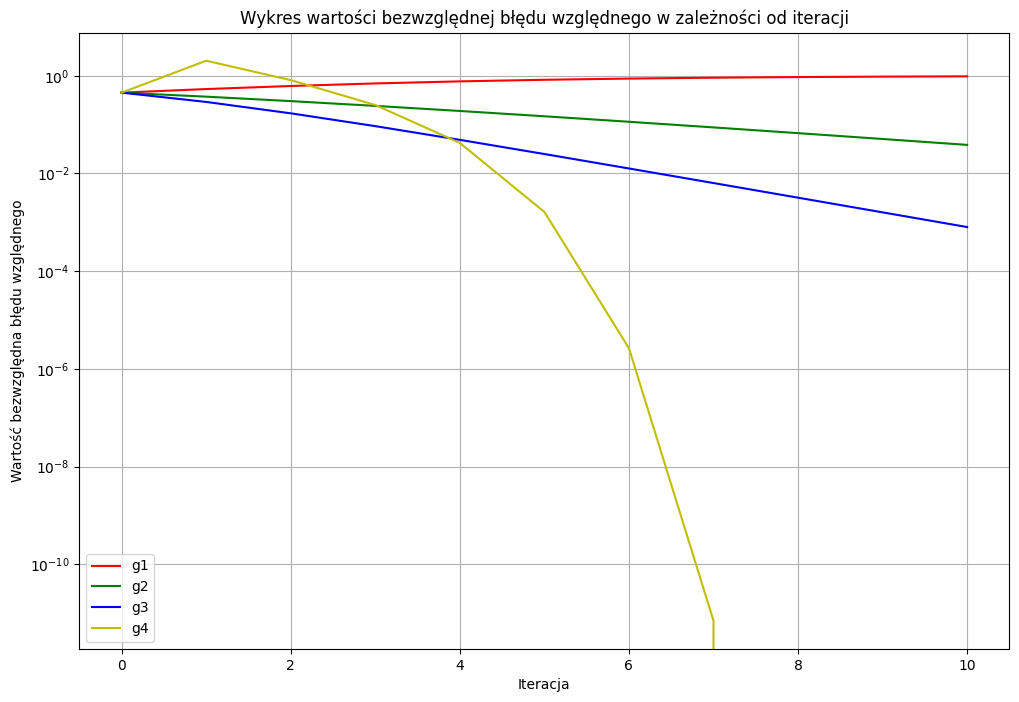

In [12]:
iteration = np.arange(0, 11, 1)
colors = ['r', 'g', 'b', 'y']
i = 0
plt.figure(figsize=(12, 8))
for function in iterative_functions:
    x0 = 1.55
    _, errors = calculate_order_of_convergence(x0, function)
    plt.semilogy(iteration, errors, label=function.__name__, color=colors[i])
    i += 1

plt.title('Wykres wartości bezwzględnej błędu względnego w zależności od iteracji')
plt.xlabel('Iteracja')
plt.ylabel('Wartość bezwzględna błędu względnego')
plt.grid()
plt.legend()
plt.show()

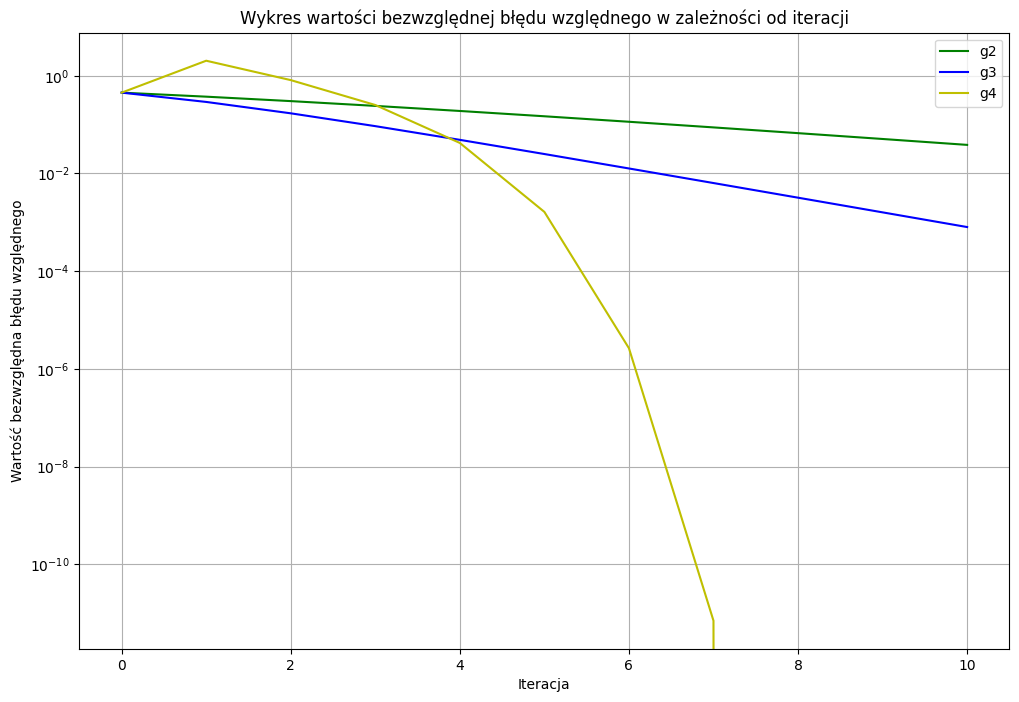

In [13]:
plt.figure(figsize=(12, 8))
i = 1
for function in iterative_functions:
    x0 = 1.55
    if function.__name__ == 'g1':
        continue
    _, errors = calculate_order_of_convergence(x0, function)
    plt.semilogy(iteration, errors, label=function.__name__, color=colors[i])
    i += 1

plt.title('Wykres wartości bezwzględnej błędu względnego w zależności od iteracji')
plt.xlabel('Iteracja')
plt.ylabel('Wartość bezwzględna błędu względnego')
plt.grid()
plt.legend()
plt.show()

$\color{yellow}{\text{Zadanie 3}}$

Definuję funkcję oraz schemat iteracyjny. Wykonuję go przez 10 iteracji dla każdego z równań, obliczając jego pierwiastek.

In [14]:
def f1(x):
    return x**3 - 2*x - 5

def f1_derivative(x):
    return 3*x**2 - 2

def f2(x):
    return np.exp(-x) - x

def f2_derivative(x):
    return -np.exp(-x) - 1

def f3(x):
    return x * np.sin(x) - 1

def f3_derivative(x):
    return np.sin(x) + x * np.cos(x)

In [15]:
def newtons_method(f, f_derivative, x0, n=10):
    x0 = x0
    for i in range(n):
        fx = f(x0)
        dfx = f_derivative(x0)
        x0 = x0 - fx / dfx
    return x0

In [16]:
for f, f_derivative in [(f1, f1_derivative), (f2, f2_derivative), (f3, f3_derivative)]:
    x0 = 2
    root = newtons_method(f, f_derivative, x0)
    print(f'Funkcja {f.__name__}, pierwiastek: {root:.4f}')

Funkcja f1, pierwiastek: 2.0946
Funkcja f2, pierwiastek: 0.5671
Funkcja f3, pierwiastek: -9.3172


$\color{yellow}{\text{Zadanie 4}}$

Definicja macierzy układu równań i macierzy Jacobiego oraz schematu dla przypadku wielowymiarowego.

In [17]:
exact_solution = np.array([np.sqrt(np.sqrt(5)/2 - 1/2), np.sqrt(5)/2 - 1/2])

x0 = np.array([1, 1])

def F(x):
    return np.array([x[0]**2 + x[1]**2 - 1, x[0]**2 - x[1]])

def J(x):
    return np.array([[2*x[0], 2*x[1]], [2*x[0], -1]])

In [18]:
def newton_multidimension(x0, F, J, n=10):
    for i in range(n):
        J_curr = J(x0)
        F_curr = F(x0)
        x0 = x0 - np.linalg.inv(J_curr).dot(F_curr)
    return x0

root = newton_multidimension(x0, F, J)
error_x1 = abs(root[0] - exact_solution[0]) / exact_solution[0]
error_x2 = abs(root[1] - exact_solution[1]) / exact_solution[1]

print(f'Pierwiastki układu równań: {root}')
print(f'Błąd względny x1: {error_x1}')
print(f'Błąd względny x2: {error_x2}')

Pierwiastki układu równań: [0.78615138 0.61803399]
Błąd względny x1: 0.0
Błąd względny x2: 1.7963785889362146e-16
